## Data processing and plotting for figure01

This notebook describes the data acquisition for figure01 and allows the user to regenerate and modify this figure based on the data provided in ~/data/figure01/

In [56]:
%matplotlib notebook
from scipy.optimize import curve_fit
import matplotlib, matplotlib.pyplot as plt
import os, numpy as np, pandas as pd

def linear(x, a, b):
    return a*x+b

# Change this to ma
parentDirectory = '../data/figure01/'

### Light ion ranges in Faraday Factory Japan REBCO coated conductor

<IPython.core.display.Javascript object>


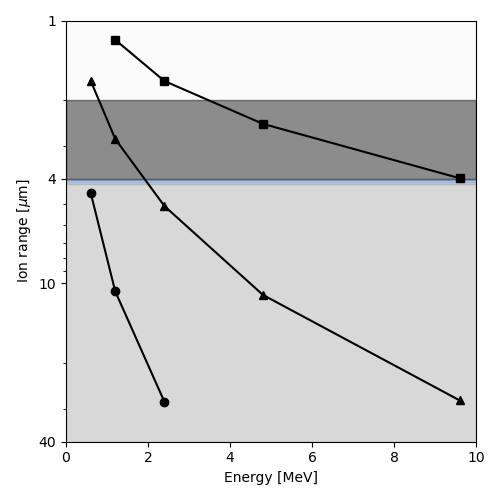

In [11]:
energies = [.6, 1.2, 2.4, 4.8, 9.6]

rngH = np.array([45152.0, 107200.0, 282200.0, np.nan, np.nan])/1e4
rngHe = np.array([16932.0, 28220.0, 50796.0, 110550.0, 278586.0])/1e4
rngO = np.array([np.nan, 11845.0, 16995.0, 24720.0, 39816.0])/1e4

vacH = np.array([2.60579259325, 1.0457980071, 0.517540289035, 0.286786496535, 0.137670579585])
vacHe = np.array([78.89102218000001, 109.80051911100001, 42.417256985, 9.442302794899998, 4.37877158805])
vacO = np.array([0.0, 0.0, 0.09474171638399999, 976.9074136910549, 1625.85747172737])

impH = np.array([306995.14999999997, 32001.07295, 4999.961505, 0.0, 0.0])
impHe = np.array([95794285.44999999, 99829836.1, 2177956.9195999997, 14999.885590000002, 1999.9985740000002])
impO = np.array([0.0, 0.0, 59000.98869, 95364285.91829999, 99879387.35796002])

fig, ax = plt.subplots(figsize=(5, 5))

ax.semilogy(energies[:3], rngH[:3], marker='o', color='k', label='Hydrogen')
ax.semilogy(energies, rngHe, marker='^', color='k', label='Helium')
ax.semilogy(energies, rngO, marker='s', color='k', label='Oxygen')

ax.set_xlabel('Energy [MeV]')
ax.set_ylabel('Ion range [$\mu$m]')

ax.set_xlim(0, 10)
ax.set_ylim(1, 40)

ax.fill_between([0, 10], 0, 2, color='#F8F8F8', alpha=.5)
ax.fill_between([0, 10], 2, 4, color='black', alpha=.45)
ax.fill_between([0, 10], 4, 4.05, color='#154A9F', alpha=.3)
ax.fill_between([0, 10], 4.05, 4.10, color='#4C7AAE', alpha=.3)
ax.fill_between([0, 10], 4.10, 4.15, color='#7D9DC2', alpha=.3)
ax.fill_between([0, 10], 4.15, 4.20, color='#AFC2D5', alpha=.3)
ax.fill_between([0, 10], 4.20, 40.20, color='gray', alpha=.3)

ax.invert_yaxis()
ax.set_yticks([1, 4, 10, 40])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

fig.tight_layout()
#ax.set_rasterized(True)
#plt.savefig('svg/srim1.svg')
#plt.savefig('png/srim1.png')

### Average displacements caused by 1200 keV protons a proton as a function of depth in a Faraday Factory Japan REBCO coated conductor

TRIM causes numerical artifacts at layer boundaries as explained in the documentation. Therefore, we find the true damage-rate in the REBCO layer by looking at a SRIM calculation of pure YBCO and extracting the displacements/A-ion that correspond to a range of 2 µm at a degraded energy 1.0088 MeV. This is the energy of incident 1.2 MeV protons  as they exit the 2 µm thick silver layer (interpolated from stopping power tables available through SRIM).

But since we still have an interface (perturbing the displacements/A-ion between 0 and 7500 A), we simulated the damage profile using 1.2 MeV protons and calculated the depth **zmin** at which the proton energy has degraded to 1.0088 MeV by interpolating the range of protons in the 0.9 to 1.3 MeV interval (also directly available from stopping power tables).

In [45]:
proton_energy = [900, 1000, 1100, 1200, 1300]
range_in_ybco = [13.53, 15.79, 18.17, 20.66, 23.27]

popt, pcov = curve_fit(linear, proton_energy, range_in_ybco)
zmin = (20.66-linear(1008.8, *popt))*1e4
zmax = zmin+20000

We can then use these bounds to extract the true displacements/A-ion depth profile from the 1.2 MeV proton calculation in pure YBCO

In [ ]:
fpath = parentDirectory+'2023-12-09-08-12-01-716672-300000H-1200keV-1-ybco.txt'
data = pd.read_csv(fpath, skiprows=1, delimiter='\t', names=['depth', 'ph', 'iz', 'fp', 'ii'])
cut = (zmin < data.depth) & (data.depth < zmax)

depth_true = 1e-4*(data1.depth[cut].values-data1.depth[cut1].values[0])+2 # region of interest [in µm]
fp_true = (1e4*data1.fp[cut].values)[xtrue <= 4] # region of interest [in µm]

fig, ax = plt.subplots()
ax.semilogy(data1.depth, data1.fp, color='lightgray')
ax.semilogy(data1.depth[cut1], data1.fp[cut1], color='k')
ax.set_title('1.2 MeV protons in YBCO [300000 ions]')
ax.set_xlabel('Depth z [A]')
ax.set_ylabel('Damage SRIM [Displacements/A-ion]')
ax.set_xlim(0, 120000)

depth_true *= 1e-4
fp_true *= 1e4

xtrue = xtrue[xtrue <= 4]

<IPython.core.display.Javascript object>


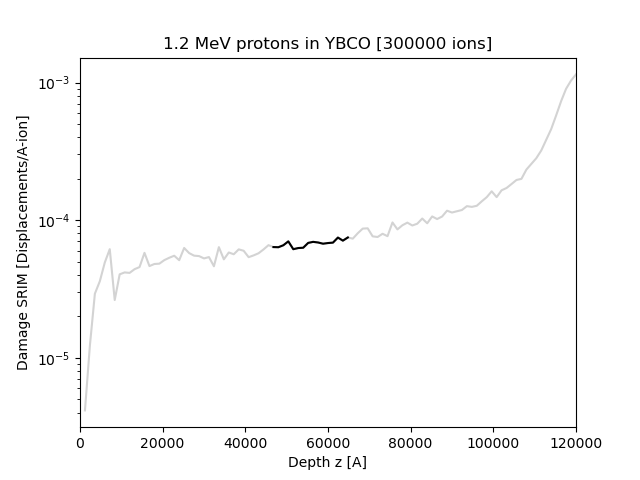

In [54]:
fpath = parentDirectory+'2023-12-09-08-12-01-716672-300000H-1200keV-1-ybco.txt'
data = pd.read_csv(fpath, skiprows=1, delimiter='\t', names=['depth', 'ph', 'iz', 'fp', 'ii'])
cut = (zmin < data.depth) & (data.depth < zmax)

fig, ax = plt.subplots()
ax.semilogy(data.depth, data.fp, color='lightgray')
ax.semilogy(data.depth[cut], data.fp[cut], color='k')
ax.set_title('1.2 MeV protons in YBCO [300000 ions]')
ax.set_xlabel('Depth z [A]')
ax.set_ylabel('Damage SRIM [Displacements/A-ion]')
ax.set_xlim(0, 120000)

depth_true = 1e-4*(data.depth[cut].values-data.depth[cut].values[0]) + 2 # region of interest [in µm]
fp_true = (1e4*data.fp[cut].values)[depth_true <= 4] # region of interest [in µm]
depth_true = depth_true[depth_true <= 4]

<IPython.core.display.Javascript object>


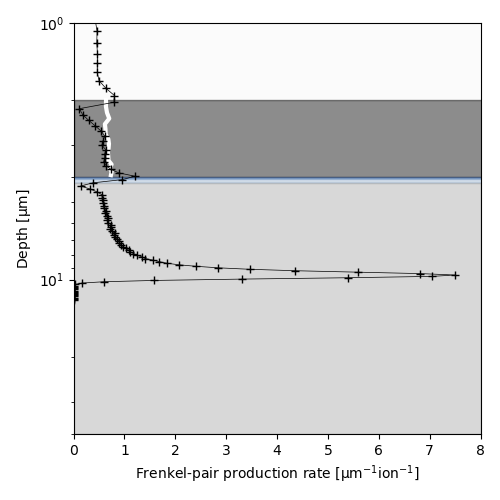

In [62]:
fpath = parentDirectory+'2023-12-08-05-18-19-210467-1000000H-1200keV-1-htstape.txt'

name, energy = fname.split('-')[-2], fname.split('-')[1].split('.')[0][:-3]
data = pd.read_csv(fpath, skiprows=1, delimiter='\t', names=['depth', 'ph', 'iz', 'fp', 'ii'])
z, fp = data.depth/1e4, data.fp*1e4 

fig, ax = plt.subplots(figsize=(5, 5), sharex=True)
ax.set_ylabel('Depth [$\mathrm{\mu}$m]')
ax.set_xlabel('Frenkel-pair production rate [$\mathrm{\mu}$m$^{-1}$ion$^{-1}$]')
ax.set_ylim(1e0, 4e1)
ax.set_xlim(0, 8)
ax.fill_between([0.000, 10], 0, 2, color='#F8F8F8', alpha=.5)
ax.fill_between([0.000, 10], 2, 4, color='black', alpha=.45)
ax.fill_between([0, 10], 4, 4.04, color='#154A9F', alpha=.3)
ax.fill_between([0, 10], 4.04, 4.07, color='#4C7AAE', alpha=.3)
ax.fill_between([0, 10], 4.07, 4.17, color='#7D9DC2', alpha=.3)
ax.fill_between([0, 10], 4.17, 4.22, color='#AFC2D5', alpha=.3)
ax.fill_between([0.000, 8], 4.22, 40, color='gray', alpha=.3)
ax.invert_yaxis()
ax.set_yticks([1, 4, 10, 40])
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

#ax.fill_between(fp, np.zeros_like(y), y, color='k', alpha=.5)
#ax.set_title('1200 keV protons cause uniform damage in the YBCO layer')

ax.semilogy(ytrue, xtrue, color='white', linewidth=3)
ax.semilogy(fp, z, 'k', label=labels[1], marker='+', linewidth=.5)

fig.tight_layout()
#ax.set_rasterized(True)
#plt.savefig('png/srim2.png')
#plt.savefig('svg/srim2.svg')
